In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('Pastel1')
import seaborn as sns
import random


N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6

<Figure size 432x288 with 0 Axes>

## Question 1.1

In [2]:
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
ONES = np.array([15,20,25,15,20,25])

In [3]:
# Construct TCs
TC = np.zeros((nsrcs,N))

for x in range(nsrcs):
    i = 0
    while i < N and i+ONES[x] < N:
        if i == 0:
            i += AV[x]

        TC[x][i:i+ONES[x]] = 1
        i += IV[x]

In [4]:
# Standardise 
for x in range(nsrcs):
    print(np.mean(TC[x]))
    TC[x] = (TC[x] - np.mean(TC[x])) / np.std(TC[x])

0.5
0.4166666666666667
0.4166666666666667
0.375
0.5
0.625


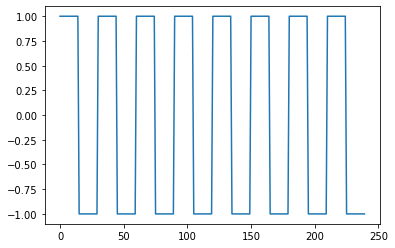

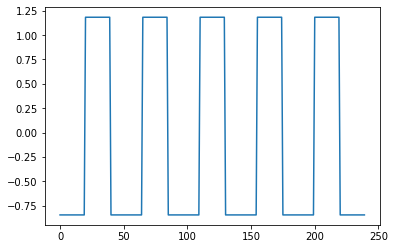

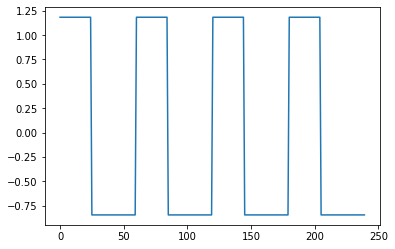

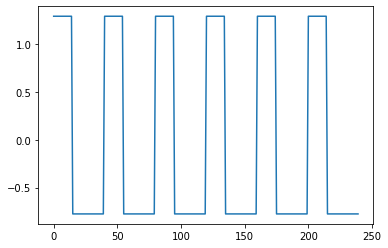

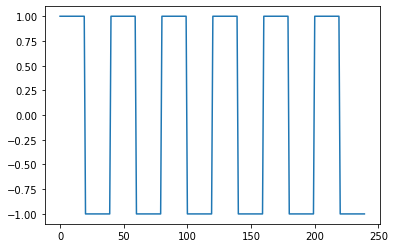

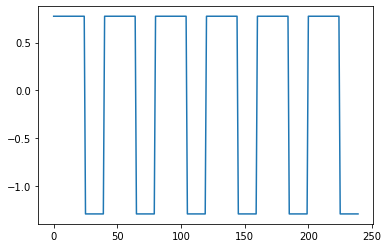

In [5]:
# Plot TCs
for i in range(6):
    plt.plot(TC[i])
    plt.savefig(f"plots/1.1_{i}.png")
    plt.show()

## Question 1.2

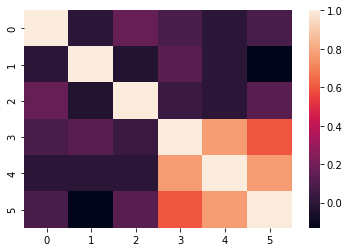

In [6]:
# CM of TCs
sns.heatmap(np.corrcoef(TC))
plt.savefig(f"plots/1.2.png")
plt.show()

In [7]:
print(np.corrcoef(TC)[3][4])
print(np.corrcoef(TC)[4][5])

0.7745966692414841
0.774596669241484


In [8]:
np.corrcoef(TC)

array([[ 1.00000000e+00, -6.47630098e-18,  1.69030851e-01,
         8.60662966e-02,  0.00000000e+00,  8.60662966e-02],
       [-6.47630098e-18,  1.00000000e+00, -2.85714286e-02,
         1.30930734e-01,  1.57281595e-17, -1.30930734e-01],
       [ 1.69030851e-01, -2.85714286e-02,  1.00000000e+00,
         4.36435780e-02, -1.20274161e-17,  1.30930734e-01],
       [ 8.60662966e-02,  1.30930734e-01,  4.36435780e-02,
         1.00000000e+00,  7.74596669e-01,  6.00000000e-01],
       [ 0.00000000e+00,  1.57281595e-17, -1.20274161e-17,
         7.74596669e-01,  1.00000000e+00,  7.74596669e-01],
       [ 8.60662966e-02, -1.30930734e-01,  1.30930734e-01,
         6.00000000e-01,  7.74596669e-01,  1.00000000e+00]])

## Question 1.3

In [9]:
def construct_tmpSM(vx, vy, hx, hy):
    tmpsm = np.zeros((x1,x2))
    for i in range(len(tmpsm[vx:vy+1])):
        tmpsm[vx:vy+1][i][hx:hy+1] = 1
    return tmpsm

In [10]:
# Construct tmpSM
tmpSM = []

tmpSM.append(construct_tmpSM(2,6,2,6))
tmpSM.append(construct_tmpSM(2,6,15,19))
tmpSM.append(construct_tmpSM(8,13,2,6))
tmpSM.append(construct_tmpSM(8,13,15,19))
tmpSM.append(construct_tmpSM(15,19,2,6))
tmpSM.append(construct_tmpSM(15,19,15,19))

In [11]:
def plotSM(data, i):
    fig, ax = plt.subplots()
    sns.heatmap(data, ax=ax)
    ax.set_xlim(1,21)
    ax.set_ylim(21,1)
    plt.savefig(f"plots/1.3_{i}.png")
    plt.show()

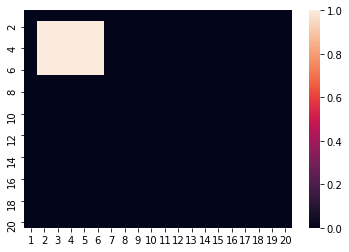

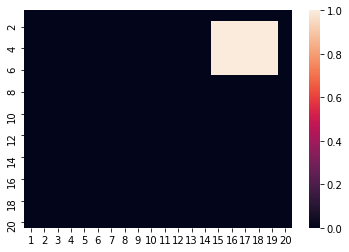

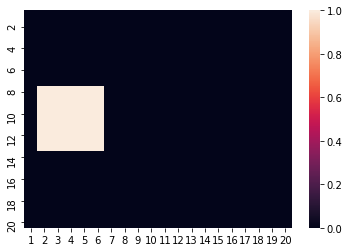

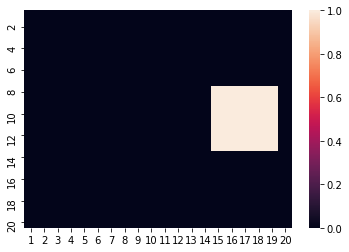

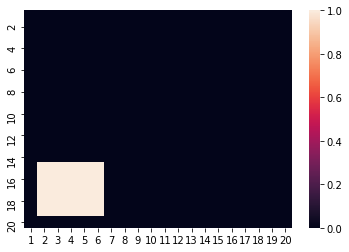

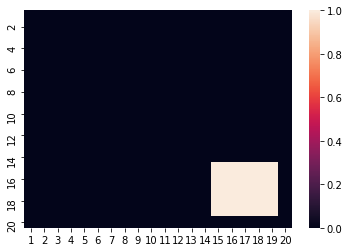

In [12]:
# Plot each tmpSM
for i in range(6):
    plotSM(tmpSM[i], i)

In [13]:
# Reshape into SM
SM = np.reshape(tmpSM, (6,441))

In [14]:
# CM of SMs
plt.savefig(f"plots/1.3_CM.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Question 1.4

In [15]:
# Random Gaussian Noise 
Gt = np.random.normal(0, np.sqrt(0.25), (240,6))
Gs = np.random.normal(0, np.sqrt(0.015), (6,441))

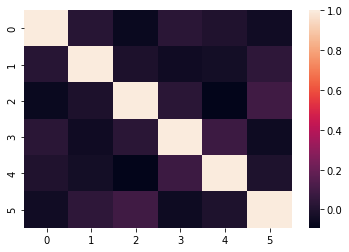

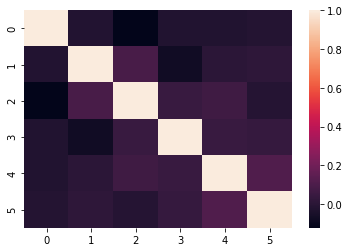

In [16]:
# Plot CM of noise across sources
sns.heatmap(np.corrcoef(np.transpose(Gt)))
plt.savefig(f"plots/1.4_Gt.png")
plt.show()
sns.heatmap(np.corrcoef(Gs))
plt.savefig(f"plots/1.4_Gs.png")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


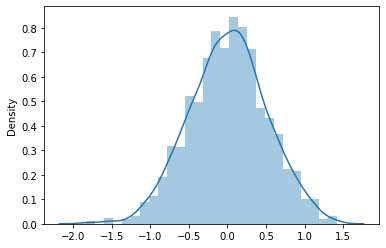

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


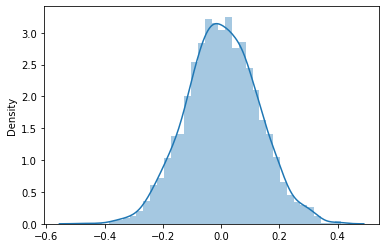

In [17]:
# Distributions of noises
sns.distplot(Gt)
plt.savefig(f"plots/1.4_distGt.png")
plt.show()
sns.distplot(Gs)
plt.savefig(f"plots/1.4_distGs.png")
plt.show()

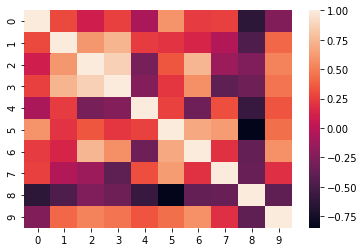

In [18]:
# Is their product correlated across V variables

product = np.matmul(Gt, Gs)
sns.heatmap(np.corrcoef(product.T[:10]))
plt.savefig(f"plots/1.4_CM.png")
plt.show()

## Question 1.5

In [19]:
X = np.matmul(np.transpose(TC) + Gt, SM + Gs)

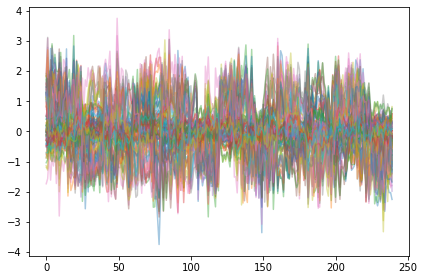

In [20]:
# Plot 100 randomly selected time series

import random

random.seed(1)

a = random.sample(range(V), 100)

for i in a:
    sns.lineplot(data = np.transpose(np.transpose(X)[i]), dashes=False, palette = 'rainbow', alpha=0.4)
plt.tight_layout()
plt.savefig(f"plots/1.5_timeseries.png")
# plt.legend(a)
plt.show()


In [21]:
varX = []
for i in range(len(np.transpose(X))):
    varX.append(np.var(np.transpose(X)[i]))


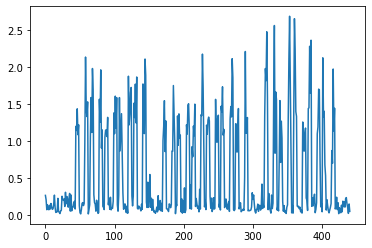

In [22]:
# Plot variance of all 411 variables
plt.plot(varX)
plt.savefig(f"plots/1.5_varX.png")
plt.show()

In [23]:
# Standardise X
X = np.transpose(X)
for j in range(441):
    X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
X = np.transpose(X)

## Question 2.1

In [24]:
# Calculate A(LSR) and D(LSR)
D = np.transpose(TC)
Dt = np.transpose(D)

A_lsr = abs(np.matmul(np.matmul(np.linalg.inv(np.matmul(Dt, D)), Dt), X))
D_lsr = np.matmul(X,np.transpose(A_lsr))

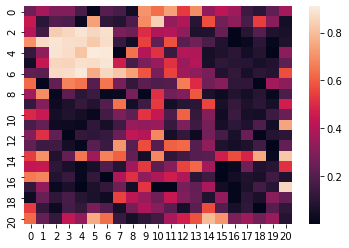

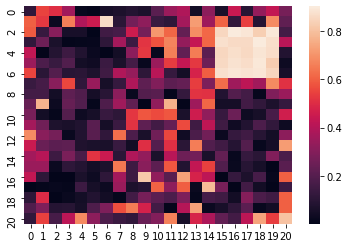

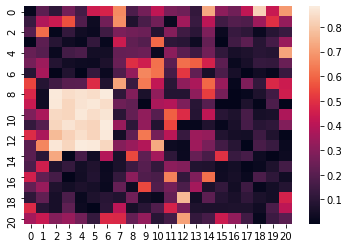

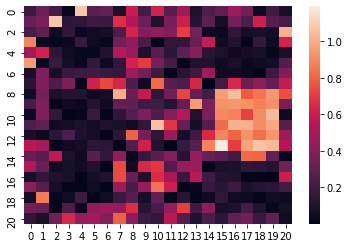

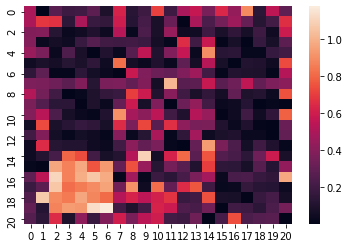

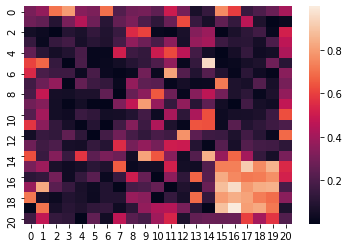

In [25]:
# Plot A_lsr
for i in range(6):
    sns.heatmap(np.reshape(A_lsr[i], (21, 21)))
    plt.savefig(f"plots/2.1_{i}_Alsr.png")
    plt.show()

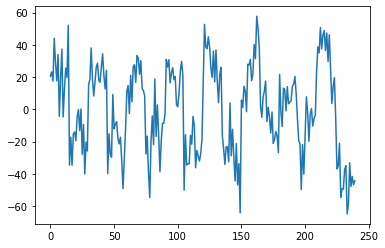

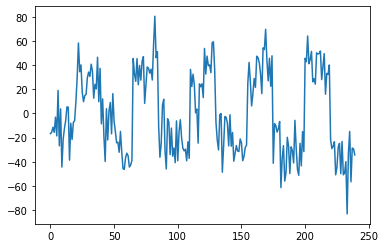

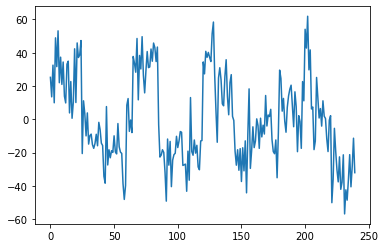

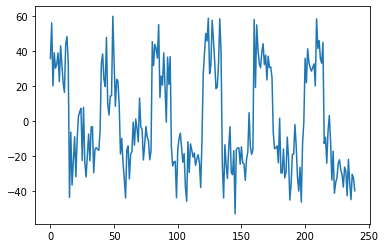

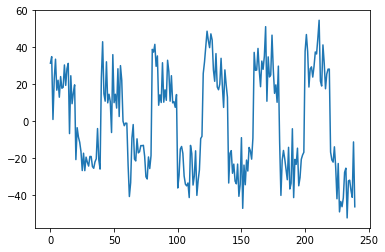

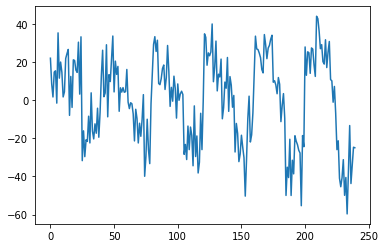

In [26]:
# Plot D_lsr
for i in range(6):
    plt.plot(np.transpose(D_lsr)[i])
    plt.savefig(f"plots/2.1_{i}_Dlsr.png")
    plt.show()

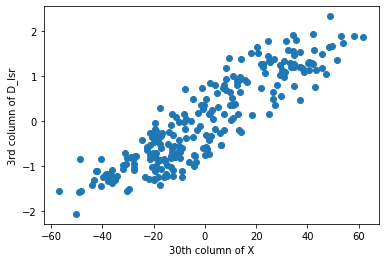

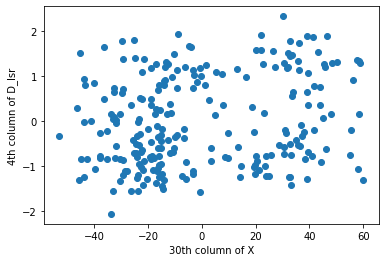

In [27]:
# Linear relationship between 3rd column of DLSR and 30th column of X
plt.scatter(D_lsr.T[2], X.T[9*21+2])
plt.ylabel("3rd column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter.png")
plt.show()
plt.scatter(D_lsr.T[3], X.T[9*21+2])
plt.ylabel("4th column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter1.png")
plt.show()

## Question 2.2

In [28]:
lmbda = 0.2*V
I = np.identity(6)
A_rr = abs(np.linalg.inv((Dt @ D) + lmbda*I) @ Dt @ X)
D_rr = X @ np.transpose(A_rr)

In [29]:
c_tlsr = []
c_trr = []

for i in range(6):
    c_tlsr.append(max(np.corrcoef(np.transpose(D_lsr), TC[i])[-1, :-1]))
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))

In [30]:
# Sums of correlation vectors

print(sum(c_tlsr))
print(sum(c_trr))

5.051524190546579
5.090782630138053


In [31]:
lmbda = 1000
A_rr = abs(np.linalg.inv((Dt @ D) + lmbda * I) @ Dt @ X)
D_rr = X @ np.transpose(A_rr)

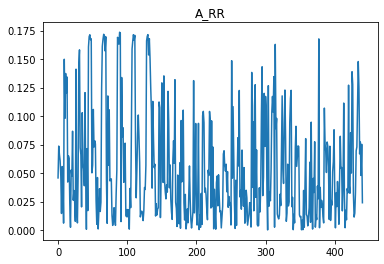

In [32]:
plt.plot(A_rr[0])
plt.title("A_RR")
plt.savefig(f"plots/2.2_Arr.png")
plt.show()

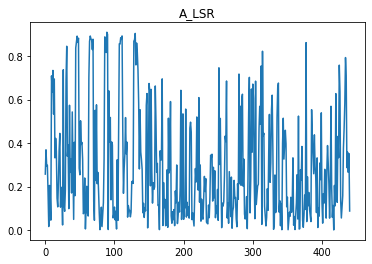

In [33]:
plt.plot(A_lsr[0])
plt.title("A_LSR")
plt.savefig(f"plots/2.2_Alsr.png")
plt.show()

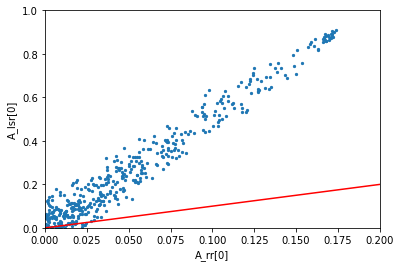

In [34]:
plt.scatter(A_rr[0], A_lsr[0], s=5)
plt.xlabel("A_rr[0]")
plt.ylabel("A_lsr[0]")
plt.xlim((0, 0.2)) 
plt.ylim((0, 1)) 
plt.plot([0, 1], [0, 1], c="r") 
plt.savefig(f"plots/2.2_compare.png")
plt.show()

## Question 2.3

In [35]:
def compute_MSE_sum(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((nsrcs, x1*x2))
    
    A_lr = np.transpose(A_lr)
    for k in range(0,x1*x2):
        A = Ao + step * (TC @ (np.reshape(X.T[k],(240,1)) - (TC.T @ Ao)))
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step * (TC @ (np.reshape(X.T[k],(240,1)) - (TC.T @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    D_lr = X @ np.transpose(A_lr)
    

    MSE_sum = sum(sum(np.power((X-(D_lr @ A_lr)), 2)))/(N*V)
#     MSE_sum = (((X-D_lr @ A_lr)**2).sum())/(N*V)

    return MSE_sum


In [36]:
random.seed(2)

# Compute average MSE across 10 realisations for 20 values of rho between 0 and 1
rho_MSE = []
for rho in list(np.arange(0.0,1.05,0.05)):
    MSE = []
    for i in range(10):
        Gt = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=(240,6))
        Gs = np.random.normal(loc=0.0, scale=np.sqrt(0.015), size=(6,441))
        X = np.matmul(np.transpose(TC) + Gt, SM + Gs)
        
        # Standardise
        X = np.transpose(X)
        for j in range(441):
            X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
        X = np.transpose(X)
        
        MSE.append(compute_MSE_sum(rho, X))
    rho_MSE.append([rho,np.mean(MSE)])


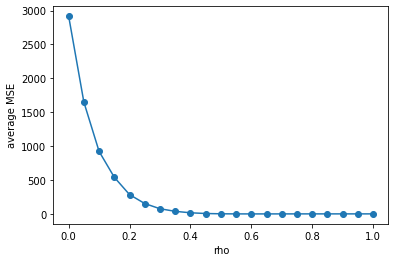

In [37]:
plt.plot(np.transpose(rho_MSE)[0], np.transpose(rho_MSE)[1])
plt.scatter(x=np.transpose(rho_MSE)[0], y=np.transpose(rho_MSE)[1])
plt.xlabel("rho")
plt.ylabel("average MSE")
plt.savefig(f"plots/2.3_rhoMSE.png")
plt.show()

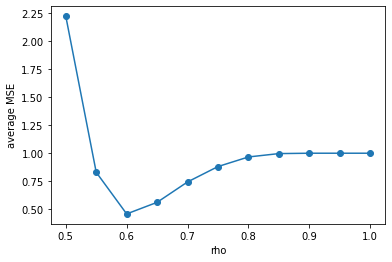

In [38]:
plt.plot(np.transpose(rho_MSE)[0][10:], np.transpose(rho_MSE)[1][10:])
plt.scatter(x=np.transpose(rho_MSE)[0][10:], y=np.transpose(rho_MSE)[1][10:])
plt.xlabel("rho")
plt.ylabel("average MSE")
plt.savefig(f"plots/2.3_rhoMSE2.png")
plt.show()

## Question 2.4

In [39]:
def compute_Alr(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((nsrcs, x1*x2))
    
    A_lr = np.transpose(A_lr)
    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(X.T[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr


In [40]:
rho = 0.6
A_lr = abs(compute_Alr(rho, X))
D_lr = X @ np.transpose(A_lr)

c_trr = []
c_srr = []
c_tlr = []
c_slr = []

for i in range(6):
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))
    c_srr.append(max(np.corrcoef(A_rr, SM[i])[-1, :-1]))
    c_tlr.append(max(np.corrcoef(np.transpose(D_lr), TC[i])[-1, :-1]))
    c_slr.append(max(np.corrcoef(A_lr, SM[i])[-1, :-1]))

In [41]:
# Sum of correlation vectors

print(sum(c_tlr))
print(sum(c_trr))
print()
print(sum(c_slr))
print(sum(c_srr))

5.334960011273187
5.055900967366155

5.036886011164178
3.195412874135392


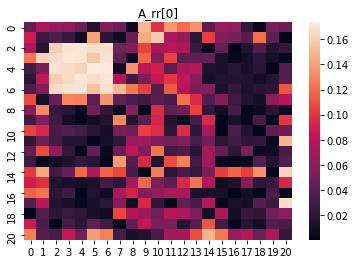

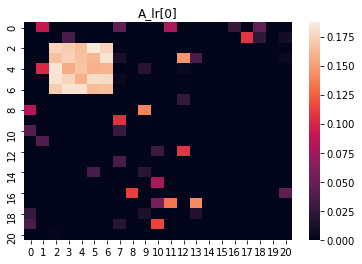

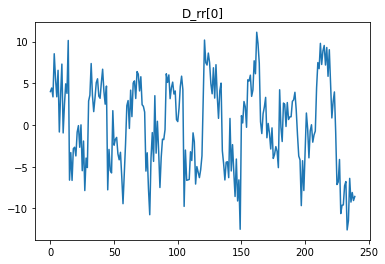

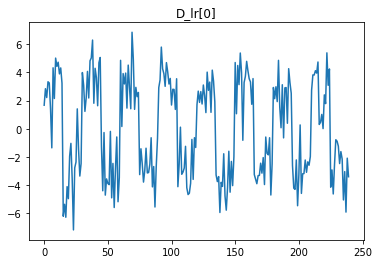

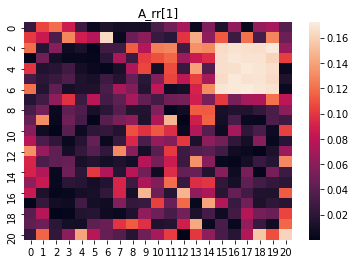

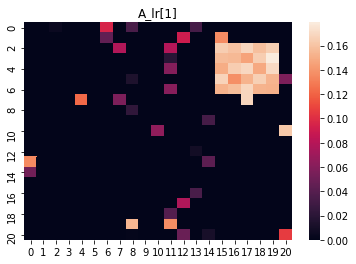

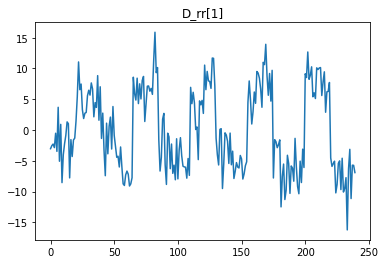

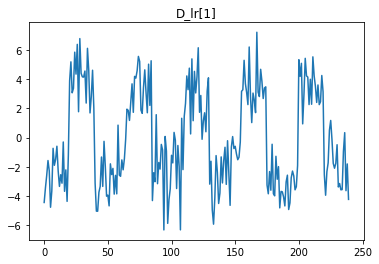

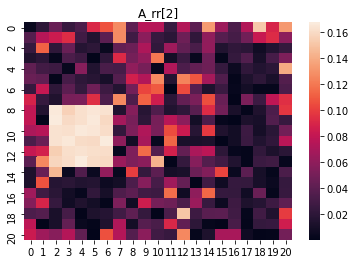

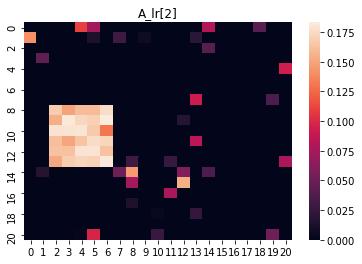

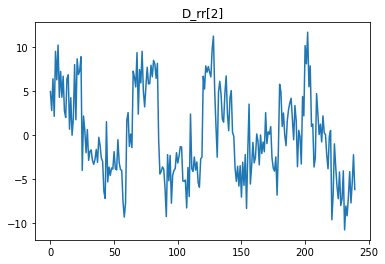

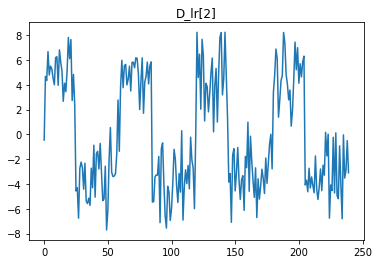

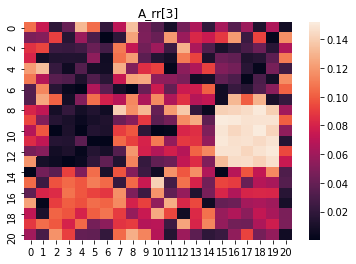

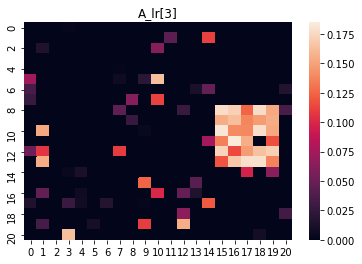

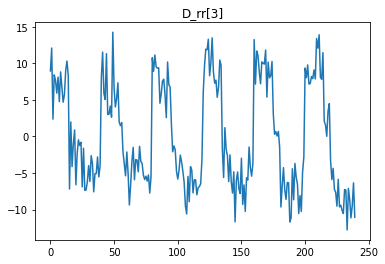

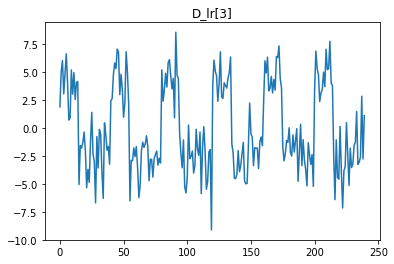

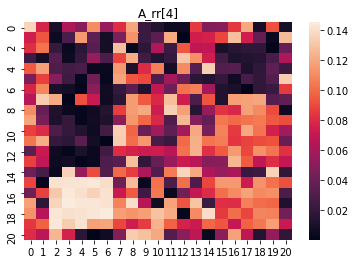

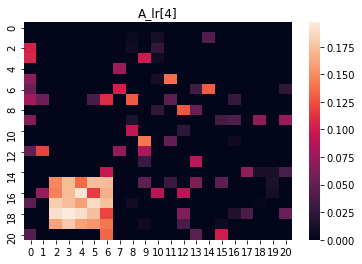

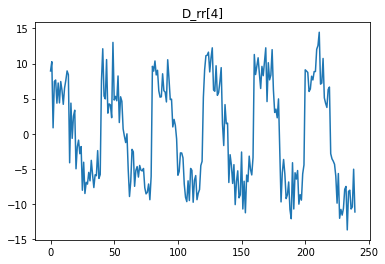

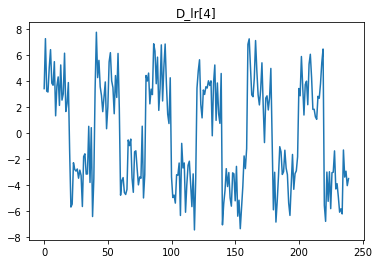

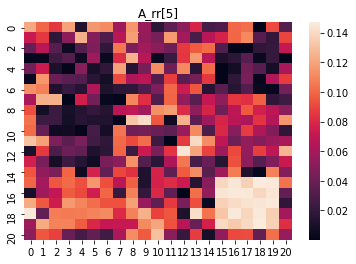

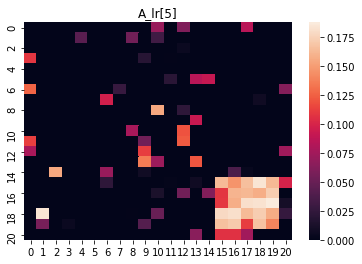

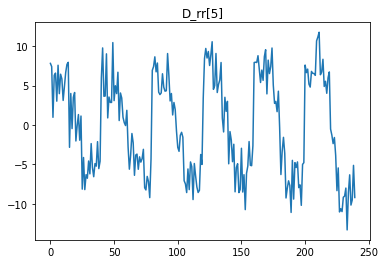

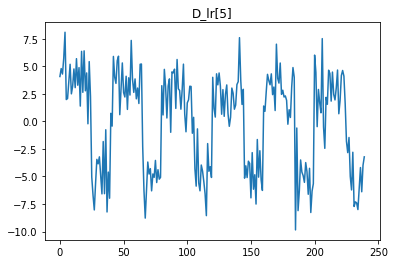

In [42]:
# Plot Arr Alr Drr and Dlr
for i in range(6):
    sns.heatmap(np.reshape(A_rr[i], (21, 21)))
    plt.title(f"A_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Arr.png")
    plt.show()
    sns.heatmap(np.reshape(A_lr[i], (21, 21)))
    plt.title(f"A_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Alr.png")
    plt.show()
    plt.plot(np.transpose(D_rr)[i])
    plt.title(f"D_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Drr.png")
    plt.show()
    plt.plot(np.transpose(D_lr)[i])
    plt.title(f"D_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Dlr.png")
    plt.show()

## Question 2.5

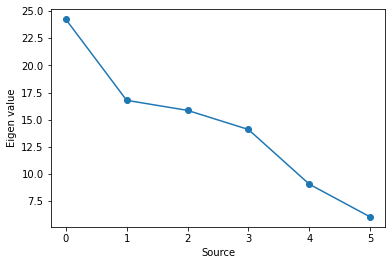

In [43]:
# Plot eigen values
plt.plot(np.linalg.svd(TC)[1])
plt.scatter(x=range(6), y=np.linalg.svd(TC)[1])
plt.ylabel("Eigen value")
plt.xlabel("Source")
plt.savefig(f"plots/2.5_eigenvalues.png")
plt.show()

In [44]:
# PCA
Z = np.linalg.svd(TC)[0]

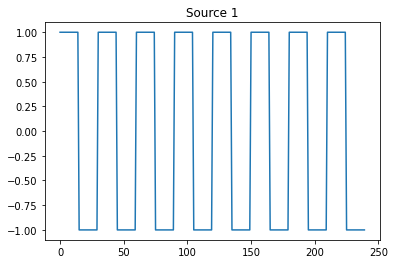

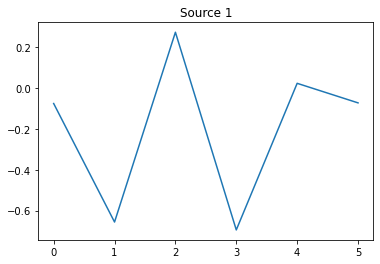

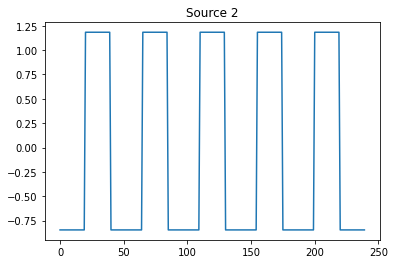

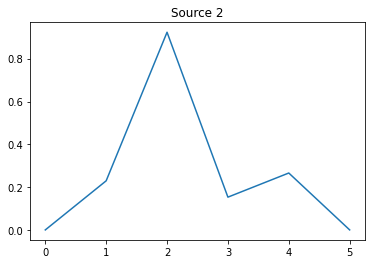

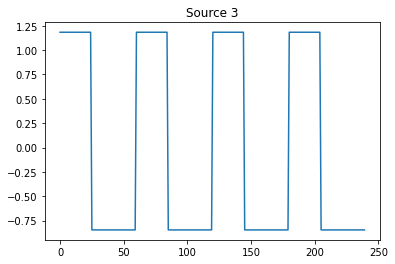

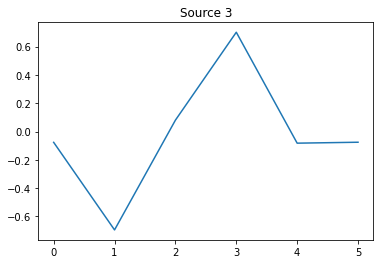

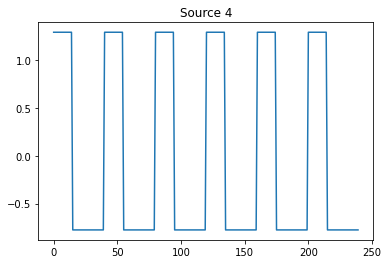

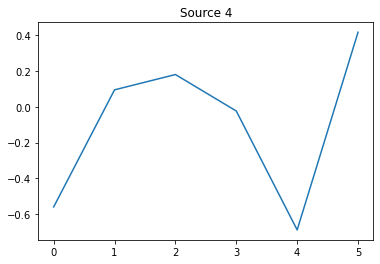

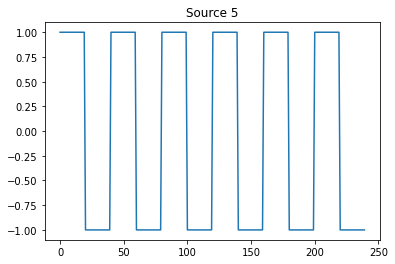

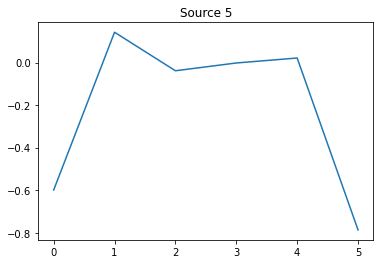

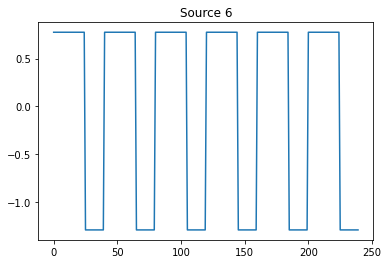

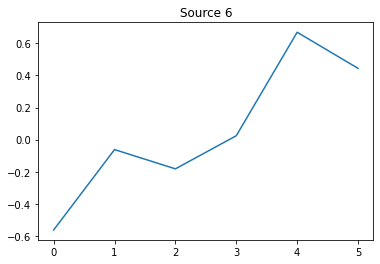

In [45]:
# Plot regressors in Z and source TCs

for i in range(6):
    plt.plot(TC[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_TC.png")
    plt.show()
    plt.plot(Z[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_Z.png")
    plt.show()

In [46]:
def compute_Alr2(rho, X, D, Dt):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((x1*x2, nsrcs))

    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr
    

In [47]:
U, sdiag, VH = np.linalg.svd(TC)
Z = np.zeros((6, 240))
np.fill_diagonal(Z, sdiag)

In [48]:
# Using Z, apply lasso regression on X
rho = 0.001
A_pcr = abs(compute_Alr2(rho,X,np.transpose(Z),Z))
D_pcr = X @ np.transpose(A_pcr)

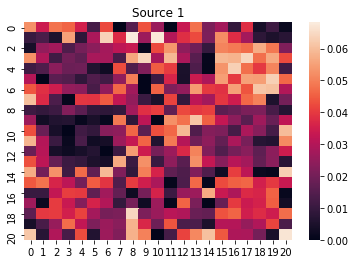

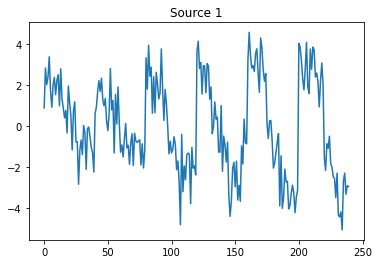

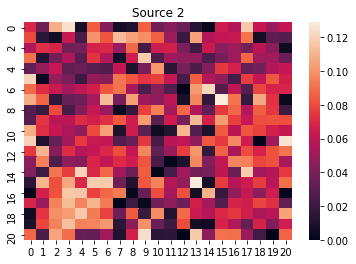

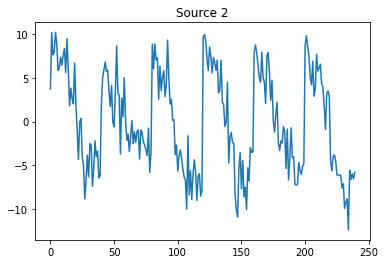

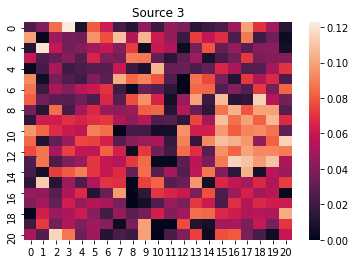

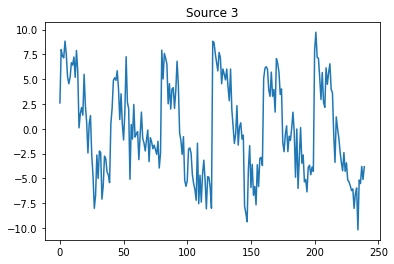

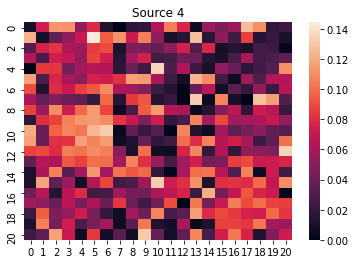

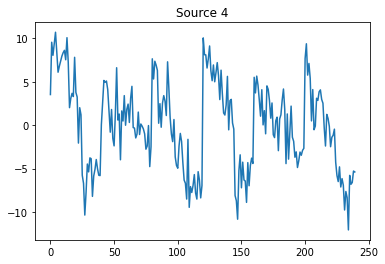

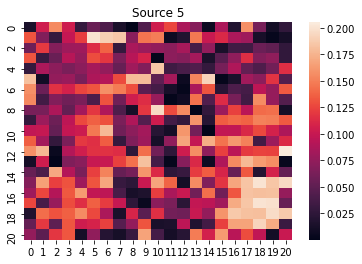

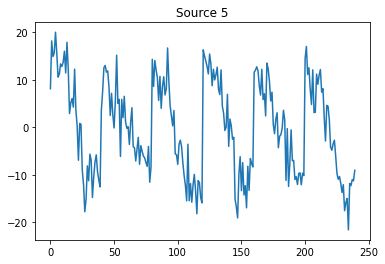

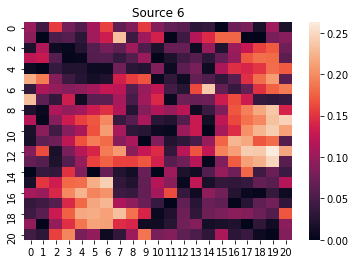

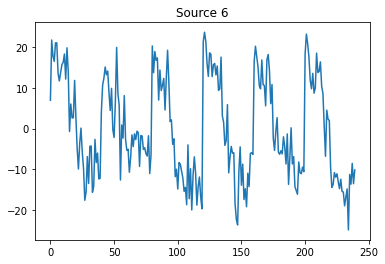

In [49]:
# Plot A(PCR) and D(PCR)
for i in range(6):
    sns.heatmap(np.reshape(A_pcr[i], (21, 21)))
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_A_pcr.png")
    plt.show()
    plt.plot(np.transpose(D_pcr)[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_D_pcr.png")
    plt.show()